In [9]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ashok\\Downloads\\CarsDatasets2025.csv", encoding="ISO-8859-1")
print(df)


     Company Names         Cars Names                             Engines  \
0          FERRARI      SF90 STRADALE                                  V8   
1      ROLLS ROYCE            PHANTOM                                 V12   
2             Ford                KA+                         1.2L Petrol   
3         MERCEDES            GT 63 S                                  V8   
4             AUDI         AUDI R8 Gt                                 V10   
...            ...                ...                                 ...   
1213        Toyota       Crown Signia                      2.5L Hybrid I4   
1214        Toyota  4Runner (6th Gen)  2.4L Turbo I4 (i-FORCE MAX Hybrid)   
1215        Toyota      Corolla Cross              2.0L Gas / 2.0L Hybrid   
1216        Toyota             C-HR+                   1.8L / 2.0L Hybrid   
1217        Toyota     RAV4 (6th Gen)        2.5L Hybrid / Plug-in Hybrid   

        CC/Battery Capacity    HorsePower Total Speed  \
0                 

In [14]:
import pandas as pd

# Load the CSV file with correct encoding
df = pd.read_csv("C:\\Users\\ashok\\Downloads\\CarsDatasets2025.csv", encoding="ISO-8859-1")

# Show all rows side by side
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", None)        # Avoid line breaks
pd.set_option("display.colheader_justify", 'left')  # Optional for alignment

# Print all rows in horizontal layout (side by side)
print(df.to_string(index=False))

# Optional: Reset options afterward
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")
# pd.reset_option("display.width")


Company Names     Cars Names                              Engines                                        CC/Battery Capacity                              HorsePower      Total Speed     Performance(0 - 100 )KM/H Cars Prices             Fuel Types              Seats Torque           
          FERRARI                           SF90 STRADALE                                             V8                                          3990 cc          963 hp        340 km/h            2.5 sec                    $1,100,000          plug in hyrbrid    2             800 Nm
      ROLLS ROYCE                                 PHANTOM                                            V12                                          6749 cc          563 hp        250 km/h            5.3 sec                      $460,000                   Petrol    5             900 Nm
             Ford                                     KA+                                    1.2L Petrol                                         1,2

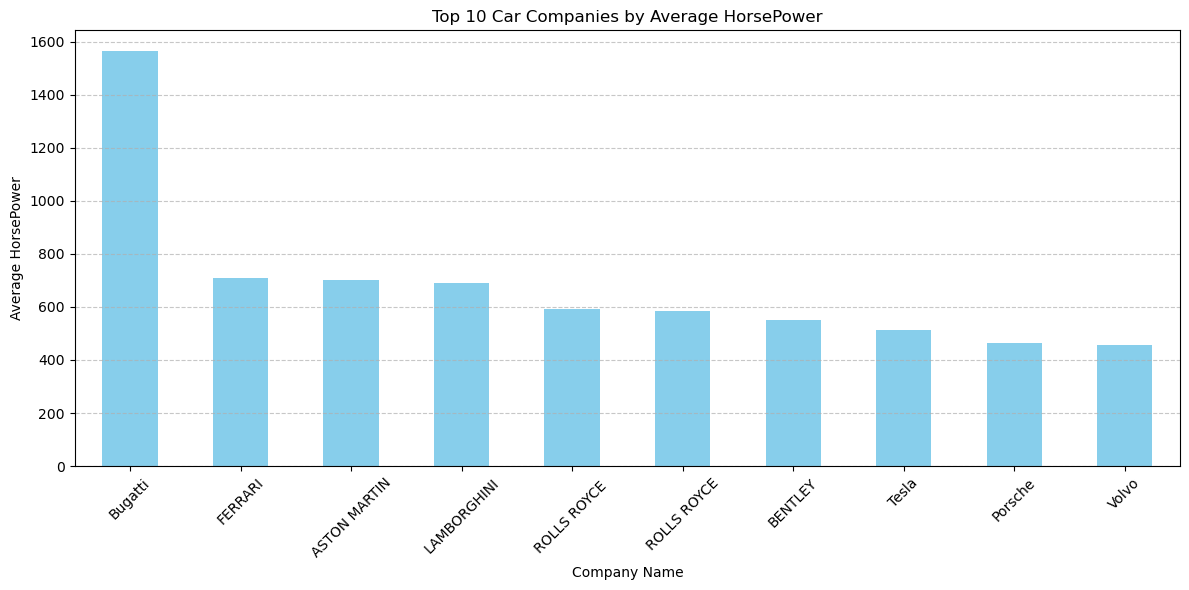

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (adjust path as needed)
df = pd.read_csv("C:\\Users\\ashok\\Downloads\\CarsDatasets2025.csv", encoding="ISO-8859-1")

# Function to extract numeric horsepower from strings like "140 – 198 hp"
def extract_hp(hp_str):
    if isinstance(hp_str, str):
        hp_str = hp_str.split(' ')[0].replace('–', '-').replace('', '-').strip()
        try:
            if '-' in hp_str:
                parts = hp_str.split('-')
                return (float(parts[0]) + float(parts[1])) / 2  # Take average if it's a range
            return float(hp_str)
        except:
            return None
    return None

# Clean the HorsePower column
df["HorsePower_clean"] = df["HorsePower"].apply(extract_hp)

# Group by company and calculate average horsepower
hp_by_company = df.groupby("Company Names")["HorsePower_clean"].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
hp_by_company.plot(kind='bar', color='skyblue')
plt.title("Top 10 Car Companies by Average HorsePower")
plt.ylabel("Average HorsePower")
plt.xlabel("Company Name")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\ashok\\Downloads\\CarsDatasets2025.csv", encoding="ISO-8859-1")

# --- Utility functions to clean columns ---

# Extract horsepower
def extract_hp(hp_str):
    if isinstance(hp_str, str):
        hp_str = hp_str.split(' ')[0].replace('–', '-').replace('', '-').strip()
        try:
            if '-' in hp_str:
                parts = hp_str.split('-')
                return (float(parts[0]) + float(parts[1])) / 2
            return float(hp_str)
        except:
            return None
    return None

# Extract speed
def extract_speed(speed_str):
    if isinstance(speed_str, str):
        try:
            return float(speed_str.split()[0].replace(',', '').strip())
        except:
            return None
    return None

# Extract 0–100 km/h time
def extract_accel(accel_str):
    if isinstance(accel_str, str):
        accel_str = accel_str.replace('–', '-').replace('', '-').strip().split()[0]
        try:
            if '-' in accel_str:
                parts = accel_str.split('-')
                return (float(parts[0]) + float(parts[1])) / 2
            return float(accel_str)
        except:
            return None
    return None

# Apply cleaning functions
df["HorsePower_clean"] = df["HorsePower"].apply(extract_hp)
df["TopSpeed_kmh"] = df["Total Speed"].apply(extract_speed)
df["Accel_0_100"] = df["Performance(0 - 100 )KM/H"].apply(extract_accel)


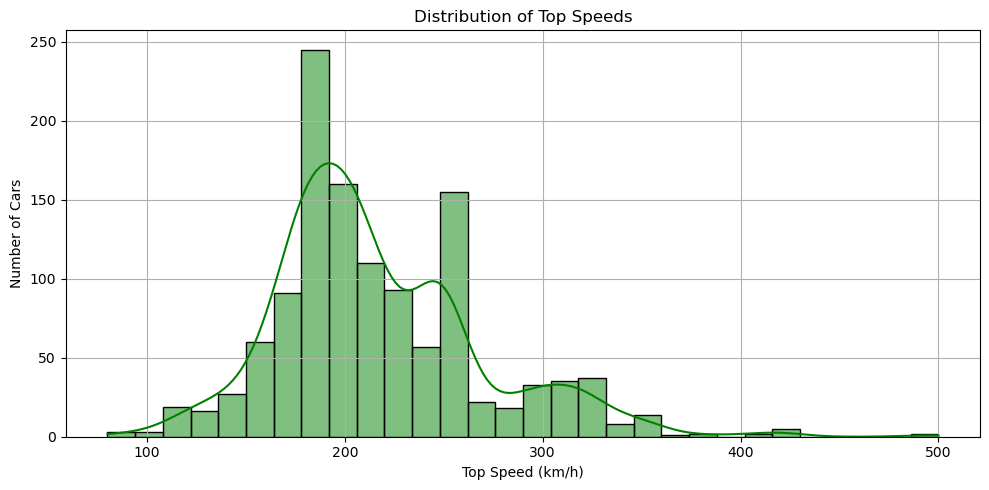

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df["TopSpeed_kmh"].dropna(), bins=30, kde=True, color="green")
plt.title("Distribution of Top Speeds")
plt.xlabel("Top Speed (km/h)")
plt.ylabel("Number of Cars")
plt.grid(True)
plt.tight_layout()
plt.show()


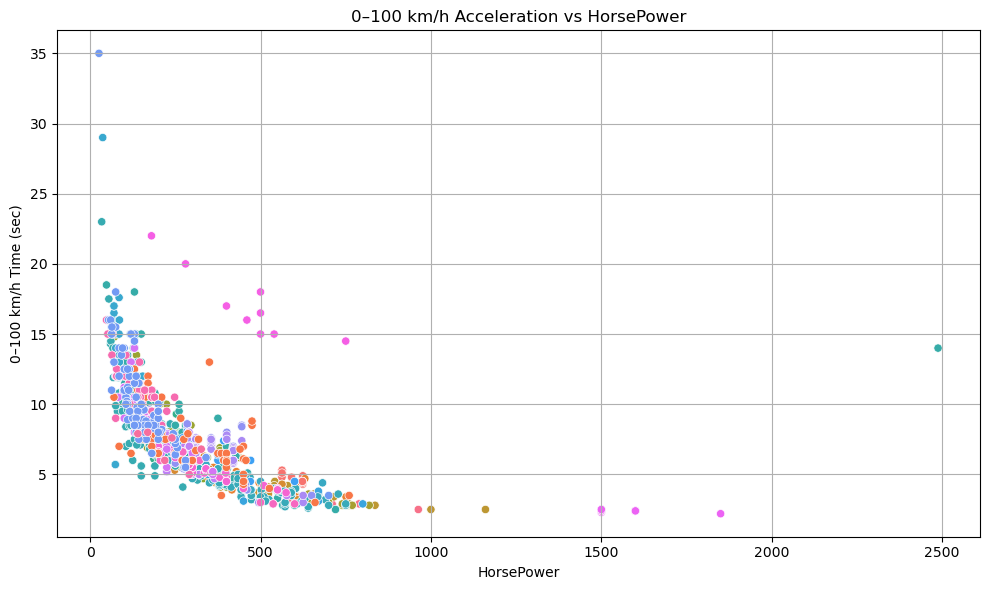

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="HorsePower_clean", y="Accel_0_100", data=df, hue="Company Names", legend=False)
plt.title("0–100 km/h Acceleration vs HorsePower")
plt.xlabel("HorsePower")
plt.ylabel("0–100 km/h Time (sec)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ashok\AppData\Local\Temp\ipykernel_12896\1639066219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="viridis")


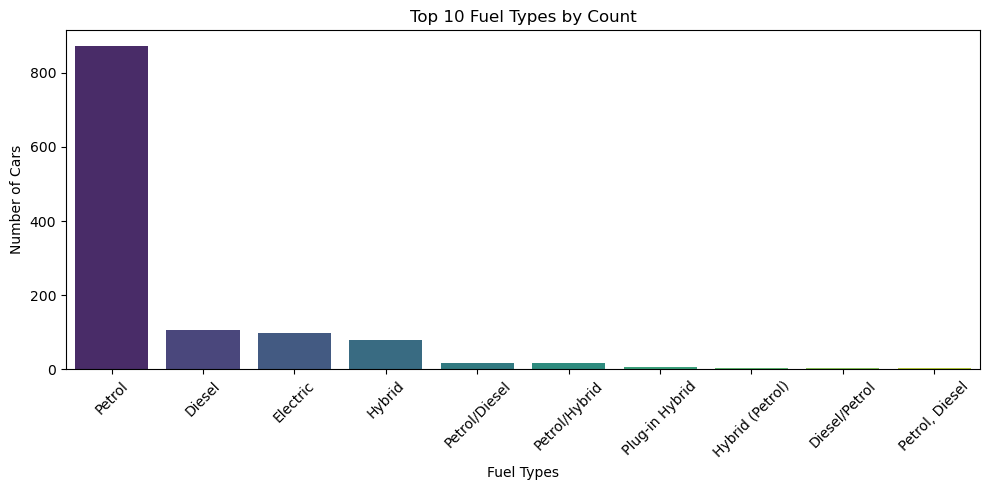

In [24]:
plt.figure(figsize=(10, 5))
fuel_counts = df["Fuel Types"].value_counts().head(10)
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="viridis")
plt.title("Top 10 Fuel Types by Count")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


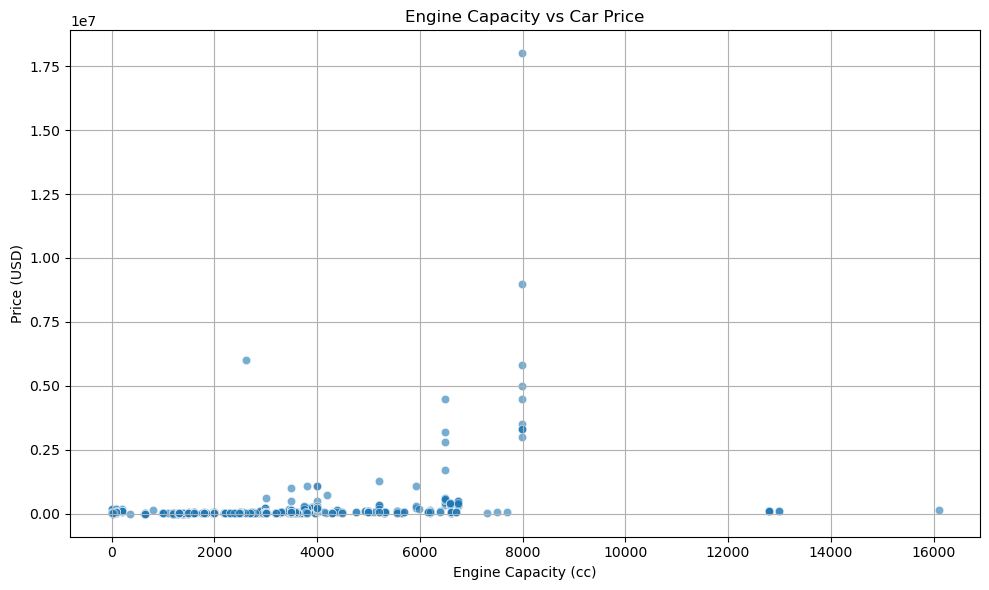

C:\Users\ashok\AppData\Local\Temp\ipykernel_12896\2082508672.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_distribution.index.astype(int), y=seats_distribution.values, palette="coolwarm")


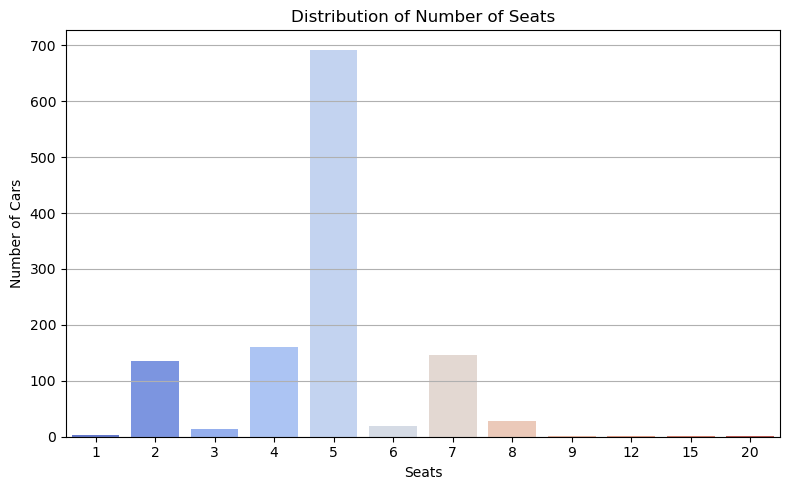

C:\Users\ashok\AppData\Local\Temp\ipykernel_12896\2082508672.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_count.index, y=company_count.values, palette="magma")


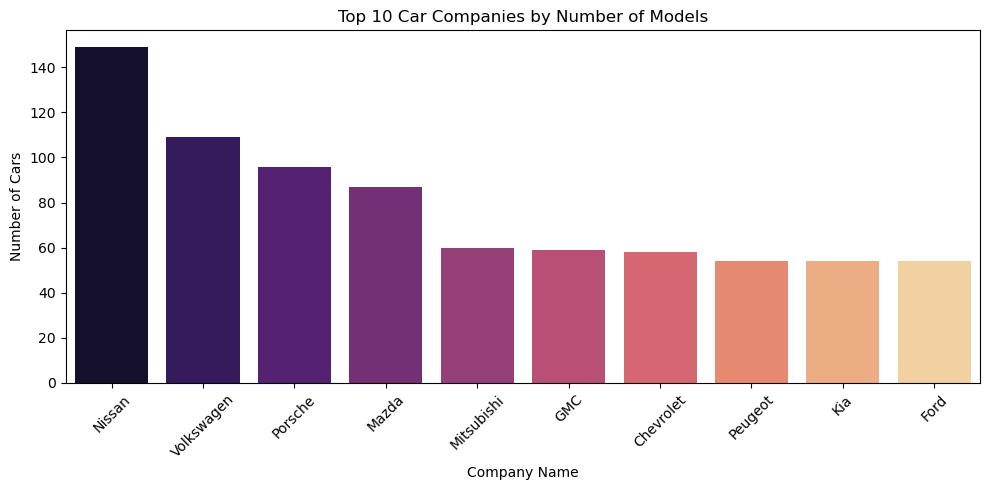

C:\Users\ashok\AppData\Local\Temp\ipykernel_12896\2082508672.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_speed_by_seats.index.astype(int), y=avg_speed_by_seats.values, palette="summer")


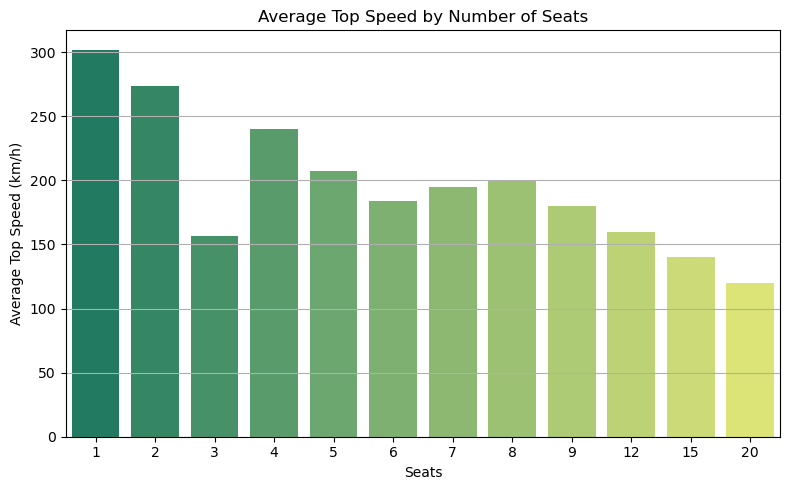

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\ashok\\Downloads\\CarsDatasets2025.csv", encoding="ISO-8859-1")

# --- Data Cleaning Functions ---
def extract_hp(hp_str):
    if isinstance(hp_str, str):
        hp_str = hp_str.split(' ')[0].replace('–', '-').replace('', '-').strip()
        try:
            if '-' in hp_str:
                parts = hp_str.split('-')
                return (float(parts[0]) + float(parts[1])) / 2
            return float(hp_str)
        except:
            return None
    return None

def extract_speed(speed_str):
    if isinstance(speed_str, str):
        try:
            return float(speed_str.split()[0].replace(',', '').strip())
        except:
            return None
    return None

def extract_accel(accel_str):
    if isinstance(accel_str, str):
        accel_str = accel_str.replace('–', '-').replace('', '-').strip().split()[0]
        try:
            if '-' in accel_str:
                parts = accel_str.split('-')
                return (float(parts[0]) + float(parts[1])) / 2
            return float(accel_str)
        except:
            return None
    return None

def extract_cc(cc_str):
    if isinstance(cc_str, str):
        try:
            cc_str = cc_str.replace(',', '').split(' ')[0].split('/')[0]
            cc_str = cc_str.replace('cc', '').strip()
            return float(cc_str)
        except:
            return None
    return None

def extract_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').replace('–', '-').replace('', '-')
        try:
            if '-' in price_str:
                parts = price_str.split('-')
                return (float(parts[0]) + float(parts[1])) / 2
            return float(price_str)
        except:
            return None
    return None

def extract_seats(seat):
    try:
        return int(seat)
    except:
        return None

# --- Apply Cleaning ---
df["HorsePower_clean"] = df["HorsePower"].apply(extract_hp)
df["TopSpeed_kmh"] = df["Total Speed"].apply(extract_speed)
df["Accel_0_100"] = df["Performance(0 - 100 )KM/H"].apply(extract_accel)
df["EngineCC"] = df["CC/Battery Capacity"].apply(extract_cc)
df["Price_clean"] = df["Cars Prices"].apply(extract_price)
df["Seats_clean"] = df["Seats"].apply(extract_seats)

# --- 1. Engine Capacity vs Price ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="EngineCC", y="Price_clean", alpha=0.6)
plt.title("Engine Capacity vs Car Price")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Distribution of Number of Seats ---
plt.figure(figsize=(8, 5))
seats_distribution = df['Seats_clean'].value_counts().sort_index()
sns.barplot(x=seats_distribution.index.astype(int), y=seats_distribution.values, palette="coolwarm")
plt.title("Distribution of Number of Seats")
plt.xlabel("Seats")
plt.ylabel("Number of Cars")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 3. Top 10 Companies by Number of Cars ---
plt.figure(figsize=(10, 5))
company_count = df['Company Names'].value_counts().head(10)
sns.barplot(x=company_count.index, y=company_count.values, palette="magma")
plt.title("Top 10 Car Companies by Number of Models")
plt.xlabel("Company Name")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. Average Top Speed by Number of Seats ---
plt.figure(figsize=(8, 5))
avg_speed_by_seats = df[['Seats_clean', 'TopSpeed_kmh']].dropna().groupby("Seats_clean")["TopSpeed_kmh"].mean()
sns.barplot(x=avg_speed_by_seats.index.astype(int), y=avg_speed_by_seats.values, palette="summer")
plt.title("Average Top Speed by Number of Seats")
plt.xlabel("Seats")
plt.ylabel("Average Top Speed (km/h)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [27]:
mydata = {
    "name" : ["ashok", "anjali", "jhansi", "priya"],
    "phone" : [1,2,3,4],
    "loc" : ["hyd", "bang", "vish", "gunt"]
}

df = pd.DataFrame(mydata)
print(df)

  name     phone loc  
0   ashok  1       hyd
1  anjali  2      bang
2  jhansi  3      vish
3   priya  4      gunt


In [32]:
import pandas as pd

# Load a sample dataset from a URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# Show the first 5 rows
print(df)


     total_bill  tip   sex     smoker day   time     size
0    16.99        1.01  Female   No     Sun  Dinner  2   
1    10.34        1.66    Male   No     Sun  Dinner  3   
2    21.01        3.50    Male   No     Sun  Dinner  3   
3    23.68        3.31    Male   No     Sun  Dinner  2   
4    24.59        3.61  Female   No     Sun  Dinner  4   
5    25.29        4.71    Male   No     Sun  Dinner  4   
6     8.77        2.00    Male   No     Sun  Dinner  2   
7    26.88        3.12    Male   No     Sun  Dinner  4   
8    15.04        1.96    Male   No     Sun  Dinner  2   
9    14.78        3.23    Male   No     Sun  Dinner  2   
10   10.27        1.71    Male   No     Sun  Dinner  2   
11   35.26        5.00  Female   No     Sun  Dinner  4   
12   15.42        1.57    Male   No     Sun  Dinner  2   
13   18.43        3.00    Male   No     Sun  Dinner  4   
14   14.83        3.02  Female   No     Sun  Dinner  2   
15   21.58        3.92    Male   No     Sun  Dinner  2   
16   10.33    

In [34]:
# Basic info
print("Shape:", df.shape)          # Rows and columns
print("\nColumn names:", df.columns)
print("\nData types:\n", df.dtypes)

# Summary statistics
print("\nSummary:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Shape: (244, 7)

Column names: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Data types:
 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Summary:
        total_bill  tip         size      
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [36]:
# Average tip
print("Average Tip:", df["tip"].mean())

# Group by day
print("\nAverage Tip by Day:\n", df.groupby("day")["tip"].mean())

# Total bill vs tip
print("\nCorrelation between total bill and tip:", df["total_bill"].corr(df["tip"]))


Average Tip: 2.99827868852459

Average Tip by Day:
 day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

Correlation between total bill and tip: 0.6757341092113641


In [38]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


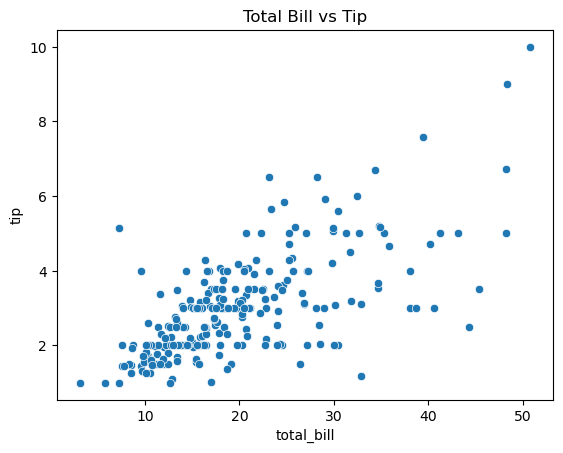

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.title("Total Bill vs Tip")
plt.show()


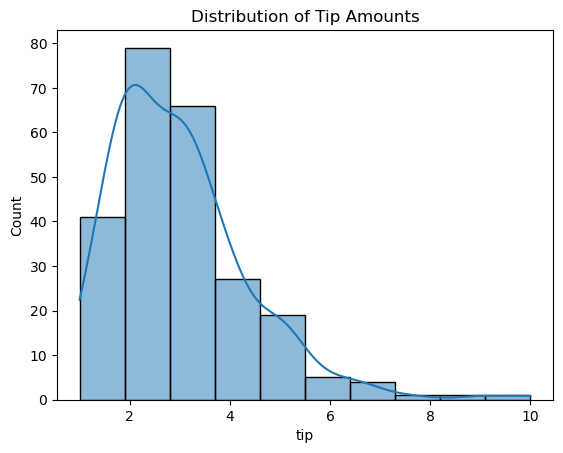

In [42]:
sns.histplot(data=df, x="tip", bins=10, kde=True)
plt.title("Distribution of Tip Amounts")
plt.show()


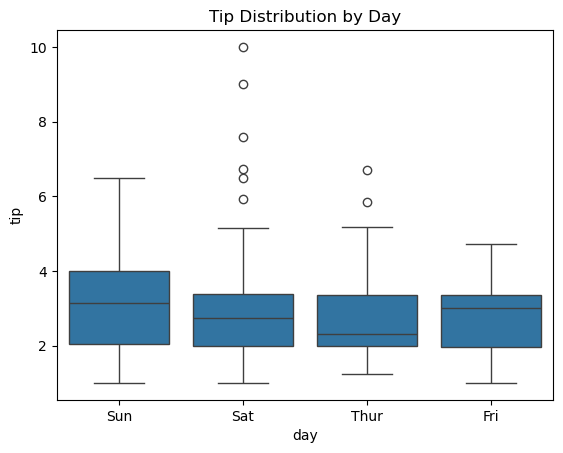

In [43]:
sns.boxplot(data=df, x="day", y="tip")
plt.title("Tip Distribution by Day")
plt.show()
